In [1]:
from __future__ import print_function

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
from ipywidgets import fixed, interact, interact_manual, interactive
from natsort import index_natsorted
from scipy.stats import norm

%load_ext line_profiler
%matplotlib inline
pyo.init_notebook_mode(connected=True)

In [4]:
df = pd.read_csv("../../data/3_analysis-resistance/all_rgiout_2022-12-01", sep="\t")
df = df.sort_values(
    by=["Accession_Number"],
    ascending=True,
    key=lambda x: np.argsort(index_natsorted(df["Accession_Number"])),
    ignore_index=True,
)
df[["Species", "Subspecies"]] = df["Strain"].str.split("subsp.", 1, expand=True)
df = df.replace(np.nan, "Null", regex=True)

rgiintegron = pd.read_csv(
    "../../data/3_analysis-resistance/rgi_subset_integronoverlap",
    sep="\t",
    names=df.columns.values,
)
rgiintegron["Species"] = rgiintegron["Strain"].str.split("subsp.", 1, expand=True)
rgiintegron["Subspecies"] = "Null"
contigdf = pd.concat(
    [
        df["Accession_Number"],
        df["Contig"].str.split("_", expand=True)[0].str.split("|").str[-1],
    ],
    axis=1,
).copy()

ecoli_mlplasmid_out = pd.read_csv(
    "../../data/3_analysis-plasmid/merged-Escherichia_coli-mlplasmidout", sep="\t"
)
ecoli_mlplasmid_out["Contig"] = ecoli_mlplasmid_out["Contig_name"].str.split(
    " ", expand=True
)[0]
ecoliplasmids_df = contigdf.loc[
    contigdf["Accession_Number"].isin(ecoli_mlplasmid_out["AccNum"])
]
ecoliplasmids_df = ecoliplasmids_df.loc[
    ecoliplasmids_df[0].isin(ecoli_mlplasmid_out["Contig"])
]
ecoliplasmids_df = df.loc[ecoliplasmids_df.index].copy()
df

,Accession_Number,Strain,Assembly_No,Year_Cultured,ORF_ID,Contig,Start,Stop,Orientation,Cut_Off,...,Predicted_DNA,Predicted_Protein,CARD_Protein_Sequence,Percentage Length of Reference Sequence,ID,Model_ID,Nudged,Note,Species,Subspecies
0,NCTC1,Shigella flexneri,1,1914,ENA|LM651928|LM651928.1_231 # 254564 # 255658 ...,ENA|LM651928|LM651928.1_231,254564.0,255658.0,+,Strict,...,ATGGAAAAACTGCGGGTAGGAATCGTTTTTGGTGGTAAATCAGCGG...,MEKLRVGIVFGGKSAEHEVSLQSAKNIVDAIDKSRFDVVLLGIDKQ...,MQNKKIAVIFGGNSTEYEVSLQSASAVFENINTNKFDIIPIGITRS...,104.3,gnl|BL_ORD_ID|1071|hsp_num:0,1157.0,Null,Null,Shigella flexneri,Null
1,NCTC1,Shigella flexneri,1,1914,ENA|LM651928|LM651928.1_406 # 416835 # 419984 ...,ENA|LM651928|LM651928.1_406,416835.0,419984.0,-,Strict,...,ATGCCTAATTTCTTTATCGATCGCCCGATTTTTGCGTGGGTGATCG...,MPNFFIDRPIFAWVIAIIIMLAGGLAILKLPVAQYPTIAPPAVTIS...,MPNFFIDRPIFAWVIAIIIMLAGGLAILKLPVAQYPTIAPPAVTIS...,100.0,gnl|BL_ORD_ID|1013|hsp_num:0,1104.0,Null,Null,Shigella flexneri,Null
2,NCTC1,Shigella flexneri,1,1914,ENA|LM651928|LM651928.1_407 # 420007 # 421200 ...,ENA|LM651928|LM651928.1_407,420007.0,421200.0,-,Strict,...,ATGAACAAAAACAGAGGGTTTACGCCTCTGGCGGTCGTTCTGATGC...,MNKNRGFTPLAVVLMLSGSLALTGCDDKQAQQGGQQMPAVGVVTVK...,MNKNRGFTPLAVVLMLSGSLALTGCDDKQAQQGGQQMPAVGVVTVK...,100.0,gnl|BL_ORD_ID|2328|hsp_num:0,2661.0,Null,Null,Shigella flexneri,Null
3,NCTC1,Shigella flexneri,1,1914,ENA|LM651928|LM651928.1_913 # 909925 # 911673 ...,ENA|LM651928|LM651928.1_913,909925.0,911673.0,+,Strict,...,ATGCATAACGACAAAGATCTCTCTACGTGGCAGACATTCCGCCGAC...,MHNDKDLSTWQTFRRLWPTIAPFKAGLIVAGVALILNAASDTFMLS...,MHNDKDLSTWQTFRRLWPTIAPFKAGLIVAGVALILNAASDTFMLS...,100.0,gnl|BL_ORD_ID|2192|hsp_num:0,2423.0,Null,Null,Shigella flexneri,Null
4,NCTC1,Shigella flexneri,1,1914,ENA|LM651928|LM651928.1_1084 # 1070322 # 10715...,ENA|LM651928|LM651928.1_1084,1070322.0,1071530.0,-,Strict,...,ATGTCCCGCGTATCGCAGGCGAGGAACCTGGGTAAATATTTCCTGC...,MSRVSQARNLGKYFLLIDNMLVVLGFFVVFPLISIRFVDQMGWAAV...,MSRVSQARNLGKYFLLIDNMLVVLGFFVVFPLISIRFVDQMGWAAV...,100.0,gnl|BL_ORD_ID|342|hsp_num:0,375.0,Null,Null,Shigella flexneri,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31498,NCTC14382,Yersinia canariae,1,2018,ENA|CP043727|CP043727.1_3533 # 3911579 # 39121...,ENA|CP043727|CP043727.1_3533,3911579.0,3912193.0,+,Strict,...,ATGAAAGCAATAATTATTGATGACCATCCTCTTGCGATCGCCGCTA...,MKAIIIDDHPLAIAAIRNLLTKNDIEILAELVEGGSAVQRIETLKP...,MNAIIIDDHPLAIAAIRNLLIKNDIEILAELTEGGSAVQRVETLKP...,100.0,gnl|BL_ORD_ID|938|hsp_num:0,1015.0,Null,Null,Yersinia canariae,Null
31499,NCTC14382,Yersinia canariae,1,2018,ENA|CP043727|CP043727.1_3965 # 4393476 # 43941...,ENA|CP043727|CP043727.1_3965,4393476.0,4394108.0,+,Strict,...,ATGGTTCTCGGCAAGCCACAAACAGACCCGACTCTCGAATGGTTCC...,MVLGKPQTDPTLEWFLSHCHIHKYPSKSTLIHQGEKAETLYYIVKG...,MVLGKPQTDPTLEWFLSHCHIHKYPSKSKLIHQGEKAETLYYIVKG...,100.0,gnl|BL_ORD_ID|803|hsp_num:0,869.0,Null,Null,Yersinia canariae,Null
31500,NCTC14382,Yersinia canariae,1,2018,ENA|CP043727|CP043727.1_734 # 828203 # 829966 ...,ENA|CP043727|CP043727.1_734,828203.0,829966.0,+,Strict,...,ATGAAAGCAGCGCGCCCCGGGAAGTTAAAGCGCCAGGAAGAACAAG...,MKAARPGKLKRQEEQASFISWRFALLCGCILLALVGLMLRTAYLQV...,MVKFNSSRKSGKSKKTIRKLTAPETVKQNKPQKVFEKCFMRGRYML...,96.23,gnl|BL_ORD_ID|2503|hsp_num:0,2886.0,Null,Null,Yersinia canariae,Null
31501,NCTC14382,Yersinia canariae,1,2018,ENA|CP043727|CP043727.1_3889 # 4333449 # 43346...,ENA|CP043727|CP043727.1_3889,4333449.0,4334633.0,-,Strict,...,ATGTCTAAAGAAAAGTTTGAACGTACAAAACCGCACGTTAATGTGG...,MSKEKFERTKPHVNVGTIGHVDHGKTTLTAAITTVLAKTYGGSARA...,MLSPEGESTIVRNIAVSKEKFERTKPHVNVGTIGHVDHGKTTLTAA...,96.33,gnl|BL_ORD_ID|1972|hsp_num:0,2158.0,Null,Null,Yersinia canariae,Null


In [5]:
amrfinder_df = pd.read_csv(
    "../../data/5_amrfinderplus/merged_amrfinderout",
    sep="\t",
    names=[
        "Accession_Number",
        "Protein identifier",
        "Contig id",
        "Start",
        "Stop",
        "Strand",
        "Gene symbol",
        "Sequence name",
        "Scope",
        "Element type",
        "Element subtype",
        "Class",
        "Subclass",
        "Method",
        "Target length",
        "Reference sequence length",
        "Coverage of reference sequence",
        "% Identity to reference sequence",
        "Alignment length",
        "Accession of closest sequence",
        "Name of closest sequence",
        "HMM id",
        "HMM description",
    ],
)
amrfinder_df

,Accession_Number,Protein identifier,Contig id,Start,Stop,Strand,Gene symbol,Sequence name,Scope,Element type,...,Method,Target length,Reference sequence length,Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description
0,NCTC9966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCTC9163,NaN,CABDVW010000001.1,1172469.0,1175600.0,-,oqxB,multidrug efflux RND transporter permease subu...,core,AMR,...,BLASTX,1044.0,1050.0,99.43,100.00,1044.0,WP_004149399.1,multidrug efflux RND transporter permease subu...,NaN,NaN
2,NCTC9163,NaN,CABDVW010000001.1,1175644.0,1176816.0,-,oqxA,multidrug efflux RND transporter periplasmic a...,core,AMR,...,EXACTX,391.0,391.0,100.00,100.00,391.0,WP_002914189.1,multidrug efflux RND transporter periplasmic a...,NaN,NaN
3,NCTC9163,NaN,CABDVW010000001.1,2670088.0,2670945.0,+,blaSHV-26,inhibitor-resistant broad-spectrum class A bet...,core,AMR,...,ALLELEX,286.0,286.0,100.00,100.00,286.0,WP_023280043.1,inhibitor-resistant broad-spectrum class A bet...,NaN,NaN
4,NCTC9163,NaN,CABDVW010000001.1,4567873.0,4568286.0,-,fosA,FosA5 family fosfomycin resistance glutathione...,core,AMR,...,BLASTX,138.0,139.0,99.28,97.10,138.0,WP_004146118.1,FosA5 family fosfomycin resistance glutathione...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,NCTC10313,NaN,UGLW01000003.1,2730155.0,2731012.0,+,blaSHV-11,broad-spectrum class A beta-lactamase SHV-11,core,AMR,...,ALLELEX,286.0,286.0,100.00,100.00,286.0,WP_004176269.1,broad-spectrum class A beta-lactamase SHV-11,NaN,NaN
2416,NCTC10313,NaN,UGLW01000003.1,4062473.0,4063645.0,+,oqxA,multidrug efflux RND transporter periplasmic a...,core,AMR,...,BLASTX,391.0,391.0,100.00,99.74,391.0,WP_002914189.1,multidrug efflux RND transporter periplasmic a...,NaN,NaN
2417,NCTC10313,NaN,UGLW01000003.1,4063672.0,4066821.0,+,oqxB19,multidrug efflux RND transporter permease subu...,core,AMR,...,ALLELEX,1050.0,1050.0,100.00,100.00,1050.0,WP_004149399.1,multidrug efflux RND transporter permease subu...,NaN,NaN
2418,NCTC10313,NaN,UGLW01000003.1,4662297.0,4662713.0,-,fosA,FosA5 family fosfomycin resistance glutathione...,core,AMR,...,EXACTX,139.0,139.0,100.00,100.00,139.0,WP_004146118.1,FosA5 family fosfomycin resistance glutathione...,NaN,NaN


In [6]:
amrfinder_df["Year_Cultured"] = amrfinder_df["Accession_Number"].map(
    df.drop_duplicates("Accession_Number").set_index("Accession_Number")[
        "Year_Cultured"
    ]
)
amrfinder_df["Species"] = amrfinder_df["Accession_Number"].map(
    df.drop_duplicates("Accession_Number").set_index("Accession_Number")["Species"]
)
amrfinder_df.loc[amrfinder_df["Year_Cultured"] < 1922]

,Accession_Number,Protein identifier,Contig id,Start,Stop,Strand,Gene symbol,Sequence name,Scope,Element type,...,Reference sequence length,Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description,Year_Cultured,Species
245,NCTC8385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918,Salmonella enterica
304,NCTC122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920,Escherichia coli
384,NCTC129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1915,Salmonella enterica
477,NCTC204,NaN,UGMD01000002.1,810216.0,810629.0,-,fosA,FosA5 family fosfomycin resistance glutathione...,core,AMR,...,139.0,99.28,99.28,138.0,WP_004146118.1,FosA5 family fosfomycin resistance glutathione...,NaN,NaN,1920,Klebsiella pneumoniae sensu stricto
478,NCTC204,NaN,UGMD01000002.1,2736372.0,2739521.0,-,oqxB19,multidrug efflux RND transporter permease subu...,core,AMR,...,1050.0,100.00,100.00,1050.0,WP_004149399.1,multidrug efflux RND transporter permease subu...,NaN,NaN,1920,Klebsiella pneumoniae sensu stricto
479,NCTC204,NaN,UGMD01000002.1,2739548.0,2740267.0,-,oqxA,multidrug efflux RND transporter periplasmic a...,core,AMR,...,391.0,61.38,100.00,240.0,WP_004149398.1,multidrug efflux RND transporter periplasmic a...,NaN,NaN,1920,Klebsiella pneumoniae sensu stricto
480,NCTC204,NaN,UGMD01000002.1,4246968.0,4247825.0,+,blaSHV-1,broad-spectrum class A beta-lactamase SHV-1,core,AMR,...,286.0,100.00,100.00,286.0,WP_001620095.1,broad-spectrum class A beta-lactamase SHV-1,NaN,NaN,1920,Klebsiella pneumoniae sensu stricto
485,NCTC3072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920,Salmonella enterica
717,NCTC74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1911,Salmonella enterica
782,NCTC8387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917,Salmonella enterica


In [48]:
drugyear_usage = {
    "FLUOROQUINOLONE": 1962,
    "BETA-LACTAM": 1943,
    "CEPHALOSPORIN": 1964,
    "TETRACYCLINE": 1948,
    "PHENICOL/QUINOLONE": 1949,
    "MACROLIDE": 1952,
    "RIFAMYCIN": 1963,
    "AMINOGLYCOSIDE": 1946,
    # "peptide antibiotic": 1941,  # not sure about this one
    # "glycylcycline": 1948,  # using year tetracyclines were introduced clinically
    # "triclosan": 1968,  # using wiki page
    # "cephamycin": 1964,  # using cephalosporin year
    # "carbapenem": 1985,
    # "aminocoumarin antibiotic": 1965,  # best guess from wiki article
    # "penem": 1985,  # using year carbapenems were introduced
    # "monobactam": 1986,
    "COLISTIN": 1959,
    # "disinfecting agents and intercalating dyes": 1930,  # no clue
    # "acridine dye": 1970,  # no clue?
    # "diaminopyrimidine antibiotic": 1962,
    # "elfamycin antibiotic": 1978,  # no clue
    "FOSFOMYCIN": 1971,
    # "nucleoside antibiotic": 2014,  # no clue, but looks newish
    "LINCOSAMIDE": 1963,
    # "nitroimidazole antibiotic": 1960,
    # "Null": 1920,
    # "benzalkonium chloride": 1950,  # no clude
    # "rhodamine": 1950,  # no clude
    "SULFONAMIDE": 1936,
    # "nitrofuran antibiotic": 1953,
    # "streptogramin antibiotic": 1965,
    # "oxazolidinone antibiotic": 2000,
    "GLYCOPEPTIDE": 1958,
    "FUSIDIC ACID": 1962,
    # "pleuromutilin antibiotic": 2007,
    # "bicyclomycin": 1972,  # from wiki
    # "antibacterial free fatty acids": 2000,  # noclude
    # "para-aminosalicylic acid": 1943,
    # "isoniazid": 1952,
    # "polyamine antibiotic": 2005,  # no idea
}

In [49]:
amrfinder_df[['Class', 'Subclass']].drop_duplicates().sort_values('Class')

,Class,Subclass
223,AMINOGLYCOSIDE,AMIKACIN/TOBRAMYCIN
178,AMINOGLYCOSIDE,STREPTOMYCIN
302,AMINOGLYCOSIDE,AMIKACIN/GENTAMICIN/KANAMYCIN/TOBRAMYCIN
328,AMINOGLYCOSIDE,AMINOGLYCOSIDE
462,AMINOGLYCOSIDE,GENTAMICIN/KANAMYCIN/TOBRAMYCIN
52,AMINOGLYCOSIDE,KANAMYCIN
176,AMINOGLYCOSIDE,AMIKACIN/KANAMYCIN
169,AMINOGLYCOSIDE,SPECTINOMYCIN
594,AMINOGLYCOSIDE,SPECTINOMYCIN/STREPTOMYCIN
748,AMINOGLYCOSIDE,AMIKACIN/KANAMYCIN/TOBRAMYCIN


# Function definitions

In [3]:
drugyear_usage = {
    "fluoroquinolone antibiotic": 1962,
    "penam": 1943,
    "cephalosporin": 1964,
    "tetracycline antibiotic": 1948,
    "phenicol antibiotic": 1949,
    "macrolide antibiotic": 1952,
    "rifamycin antibiotic": 1963,
    "aminoglycoside antibiotic": 1946,
    "peptide antibiotic": 1941,  # not sure about this one
    "glycylcycline": 1948,  # using year tetracyclines were introduced clinically
    "triclosan": 1968,  # using wiki page
    "cephamycin": 1964,  # using cephalosporin year
    "carbapenem": 1985,
    "aminocoumarin antibiotic": 1965,  # best guess from wiki article
    "penem": 1985,  # using year carbapenems were introduced
    "monobactam": 1986,
    "disinfecting agents and intercalating dyes": 1930,  # no clue
                                                "acridine dye": 1970,  # no clue?
    "diaminopyrimidine antibiotic": 1962,
    "elfamycin antibiotic": 1978,  # no clue
    "fosfomycin": 1971,
    "nucleoside antibiotic": 2014,  # no clue, but looks newish
    "lincosamide antibiotic": 1963,
    "nitroimidazole antibiotic": 1960,
    "Null": 1920,
    "benzalkonium chloride": 1950,  # no clude
    "rhodamine": 1950,  # no clude
    "sulfonamide antibiotic": 1936,
    "nitrofuran antibiotic": 1953,
    "streptogramin antibiotic": 1965,
    "oxazolidinone antibiotic": 2000,
    "glycopeptide antibiotic": 1958,
    "fusidic acid": 1962,
    "pleuromutilin antibiotic": 2007,
    "bicyclomycin": 1972,  # from wiki
    "antibacterial free fatty acids": 2000,  # noclude
    "para-aminosalicylic acid": 1943,
    "isoniazid": 1952,
    "polyamine antibiotic": 2005,  # no idea
}

In [4]:
def measure_obs_distance(
    dataframe, value, anthro_year, column, sums=False, verbose=False
):
    num_yearcultured_allstrains_dict = (
        dataframe.drop_duplicates(subset=["Accession_Number"])["Year_Cultured"]
        .value_counts()
        .to_dict()
    )
    num_yearcultured_valposstrains_dict = (
        dataframe.loc[dataframe[column].str.contains(value, na=False, regex=True)]
        .drop_duplicates(subset=["Accession_Number"])["Year_Cultured"]
        .value_counts()
        .to_dict()
    )
    fractional_dictionary = {}
    for years in num_yearcultured_allstrains_dict:
        if num_yearcultured_allstrains_dict[years] == 0:
            continue
        if years in num_yearcultured_valposstrains_dict:
            val = [
                num_yearcultured_valposstrains_dict[years],
                num_yearcultured_allstrains_dict[years],
            ]
            # fraction = (
            #     num_yearcultured_valposstrains_dict[years]
            #     / num_yearcultured_allstrains_dict[years]
            # )
        else:
            val = [0, num_yearcultured_allstrains_dict[years]]
        fractional_dictionary[years] = val

    yeardf = (
        pd.DataFrame.from_dict(
            fractional_dictionary, orient="index", columns=["num_pos", "all"]
        )
        .reset_index()
        .rename(columns={"index": "year"})
        .sort_values(by="year")
        .reset_index(drop=True)
    )
    yeardf["frac"] = yeardf["num_pos"] / yeardf["all"]
    if verbose:
        print(yeardf)
    anthro = {True: "Pre-Human", False: "Post-Human"}
    # line = pd.Index(yeardf["year"]).get_loc(anthro_year)
    # yeardf["row"] = np.arange(yeardf.shape[0])
    # yeardf["Anthropogenicity"] = "Pre-Human"
    # yeardf.loc[yeardf["row"] > line, "Anthropogenicity"] = "Post-Human"
    yeardf["Anthropogenicity"] = "Pre-Human"
    yeardf.loc[yeardf["year"] > anthro_year, "Anthropogenicity"] = "Post-Human"

    preanthro_mean = yeardf.loc[yeardf["Anthropogenicity"] == "Pre-Human"][
        "frac"
    ].mean()
    postanthro_mean = yeardf.loc[yeardf["Anthropogenicity"] == "Post-Human"][
        "frac"
    ].mean()
    metric = postanthro_mean - preanthro_mean
    # print("Pre-Human mean fraction = %s" % (preanthro_mean))
    # print("Post-Human mean fraction = %s" % (postanthro_mean))
    # print("metric = %s" % (metric))
    return yeardf, preanthro_mean, postanthro_mean


# shuffle year_cultured information while retaining existing structure.
#  i.e. all 1940 strains get remapped to 2019, all 2019 strains get remapped to 1982, etc.
def shuffleyears_structured(
    dataframe, value, anthro_year, column, verbose=False, simulations=500
):
    null_distances = []
    sortedyears = dataframe["Year_Cultured"].unique()
    for sim in range(simulations):
        copy_df = dataframe.copy()
        shuffledyears = dataframe["Year_Cultured"].sample(frac=1).unique()
        remapping = dict(zip(sortedyears, shuffledyears))
        copy_df["Year_Cultured"] = dataframe["Year_Cultured"].map(remapping)
        yeardf, pre, post = measure_obs_distance(
            copy_df, value, anthro_year, column, verbose
        )
        null_distances.append(post - pre)
    return null_distances


# shuffle year_cultured information while NOT retaining existing structure.
#  i.e. some 1940 strains can get remapped to 2019, some can get remapped to 1930, etc.
def shuffleyears_unstructured(
    dataframe, value, anthro_year, column, verbose=False, simulations=500
):
    null_distances = []
    sortedyears = dataframe["Year_Cultured"].unique()
    uq_strains = (
        dataframe.groupby(["Accession_Number", "Year_Cultured"], sort=False)
        .size()
        .reset_index()
    )
    uq_strains.set_index("Accession_Number", inplace=True)
    uq_strains.drop(columns=[0, "Year_Cultured"], inplace=True)
    for sim in range(simulations):
        uq_strains["RandomChoice"] = np.random.choice(sortedyears, uq_strains.shape[0])
        copy_df = dataframe.copy()
        remapping = uq_strains.to_dict()["RandomChoice"]
        copy_df["Year_Cultured"] = dataframe["Accession_Number"].map(remapping)
        yeardf, pre, post = measure_obs_distance(
            copy_df, value, anthro_year, column, verbose
        )
        null_distances.append(post - pre)
    return null_distances

In [5]:
def plot_abresist_frac(
    df,
    ex,
    year,
    verbose=True,
    sims=100,
    figname="doodoo",
    savefig=False,
    smooth=5,
    col="Drug Class",
    value="phenotype",
):

    sns.set_theme(font="Arial", style="white", font_scale=0.7)

    frac_df, pre, post = measure_obs_distance(df, ex, year, col, verbose)
    dist = post - pre

    # histogram of fraction of strains w/ RGI hits for drug class
    plt.figure(figsize=(14, 8))
    chart = sns.barplot(
        data=frac_df, x="year", y="frac", color="salmon", saturation=0.5
    )
    chart.bar_label(chart.containers[0])

    plt.axvline(pd.Index(frac_df["year"]).get_loc(year, method="nearest"))
    plt.ylabel("Fraction of bugs with phenotype")
    plt.xlabel("Year")
    plt.xticks(rotation=45)

    plt.show()

    d = {"Year": [], "frac": [], "Anthropogenicity": []}
    # xdf is the fractional df denoting the fraction of bugs w/ resistance
    for years in range(frac_df["year"].min(), frac_df["year"].max()):
        upb = smooth + years
        downb = years - smooth
        g = frac_df.loc[(frac_df["year"] <= upb) & (downb <= frac_df["year"])]
        d["Year"].append(years)
        if years >= year:
            d["Anthropogenicity"].append("Post-Human")
        else:
            d["Anthropogenicity"].append("Pre-Human")
        d["frac"].append(g["frac"].mean())
    xdf = pd.DataFrame(data=d)

    # make subplots for the figure
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax2 = ax1.twinx()

    # create another copy of the dataframe
    drop_dups = df.drop_duplicates(subset=["Accession_Number"]).copy()
    drop_dups["Anthropogenicity"] = "Post-Human"
    # print(drop_dups)

    drop_dups.loc[drop_dups["Year_Cultured"] < year, ["Anthropogenicity"]] = "Pre-Human"
    histogram = sns.histplot(
        data=drop_dups,
        x="Year_Cultured",
        hue="Anthropogenicity",
        palette=[sns.color_palette("deep")[0], sns.color_palette("deep")[1]],
        ax=ax2,
        multiple="stack",
        linewidth=0.3,
    )
    ax2.set(ylabel="Count of isolates analyzed", xlabel="Year Cultured")

    lp = sns.lineplot(
        data=xdf,
        x="Year",
        y="frac",
        markers=True,
        hue="Anthropogenicity",
        palette=[sns.color_palette("deep")[0], sns.color_palette("deep")[1]],
        legend=False,
        ax=ax1,
    )
    lp.set(ylim=(0, 1))
    dp = sns.scatterplot(
        data=xdf,
        x="Year",
        y="frac",
        hue="Anthropogenicity",
        palette=[sns.color_palette("deep")[0], sns.color_palette("deep")[1]],
        legend=False,
        ax=ax1,
    )
    ax1.set(ylabel="Fraction of isolates with {}".format(value))
    plt.axvline(year, color="red")  # , label='{} introduced'.format(year))
    trans = ax1.get_xaxis_transform()
    # x = 10
    plt.text(
        year - 4,
        0.3,
        "Introduced clinically in {}".format(year),
        rotation=90,
        transform=trans,
        fontsize="small",
    )

    # dp.axvline(year, color="red")#, label='{} introduced'.format(year))
    # plt.legend()
    # plt.text(4, 1, f'{year} introduce', ha='left', va='center')
    preab_df = xdf.loc[xdf["Anthropogenicity"] == "Pre-Human"]
    lp.hlines(
        y=preab_df["frac"].mean(),
        xmin=preab_df["Year"].min(),
        xmax=preab_df["Year"].max(),
        color=sns.color_palette("deep")[0],
    )

    postab_df = xdf.loc[xdf["Anthropogenicity"] == "Post-Human"]
    lp.hlines(
        y=postab_df["frac"].mean(),
        xmin=postab_df["Year"].min(),
        xmax=postab_df["Year"].max(),
        color=sns.color_palette("deep")[1],
    )

    if savefig:
        plt.gcf().set_size_inches(5.0, 3)
        plt.savefig(
            "{}-fractionofresist.svg".format(figname),
            bbox_inches="tight",
            dpi=300,
        )
    plt.show()

    #     fig, ax1 = plt.subplots()

    #     ax2 = ax1.twinx()

    #     sns.barplot(x="Announced Year", y="Amount Awarded", data=df, ax=ax2, alpha=.5)
    #     sns.scatterplot(x=np.arange(0,len(df)), y="Number of Awarded", data=df, ax=ax1)

    #     fig.tight_layout()  # otherwise the right y-label is slightly clipped

    #     plt.title('2016 to 2019 Announcements')

    if sims == 0:
        return

    preab_mean = frac_df.loc[frac_df["Anthropogenicity"] == "Pre-Human"]["frac"].mean()
    postab_mean = frac_df.loc[frac_df["Anthropogenicity"] == "Post-Human"][
        "frac"
    ].mean()

    nulldist = shuffleyears_structured(df, ex, year, col, verbose, simulations=sims)
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.histplot(
        nulldist, stat="density", color=sns.color_palette("deep")[0], linewidth=0
    )
    xmin, xmax = plt.xlim()
    mu_struct, std_struct = norm.fit(nulldist)
    x = np.linspace(xmin, xmax, sims)
    y_pdf = norm.pdf(x, mu_struct, std_struct)
    plt.plot(x, y_pdf, "k", linewidth=2)
    plt.axvline(dist, color="red")
    trans = ax.get_xaxis_transform()
    # x = 10
    plt.text(
        dist * 0.85,
        0.5,
        "Observed $\Delta$ = {:.3f}".format(dist),
        rotation=90,
        transform=trans,
        fontsize="x-small",
    )
    # plt.legend()
    plt.title("Structured Shuffling")
    plt.xlabel("Null $\Delta$ distribution in {} simulations".format(sims))
    if savefig:
        plt.gcf().set_size_inches(2, 3)
        plt.savefig(
            "{}-structuredshuffling.svg".format(figname), bbox_inches="tight", dpi=300
        )
    plt.show()
    pval = norm.cdf(dist, mu_struct, std_struct)
    if pval > 0.5:
        pval = 1 - pval
    print("P-value (structured) = {:.4f}".format(pval))

    nulldist = shuffleyears_unstructured(df, ex, year, col, verbose, simulations=sims)
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.histplot(
        nulldist, stat="density", color=sns.color_palette("deep")[0], edgecolor="none"
    )
    xmin, xmax = plt.xlim()
    mu_unstruct, std_unstruct = norm.fit(nulldist)
    x = np.linspace(xmin, xmax, sims)
    y_pdf = norm.pdf(x, mu_unstruct, std_unstruct)
    plt.plot(x, y_pdf, "k", linewidth=2)
    plt.axvline(dist, color="red")
    trans = ax.get_xaxis_transform()
    # x = 10
    plt.text(
        dist * 0.85,
        0.5,
        "Observed $\Delta$ = {:.3f}".format(dist),
        rotation=90,
        transform=trans,
        fontsize="x-small",
    )
    # plt.legend()
    plt.title("Unstructured Shuffling")
    plt.xlabel("Null $\Delta$ distribution in {} simulations".format(sims))
    if savefig:
        plt.gcf().set_size_inches(2, 3)
        plt.savefig(
            "{}-unstructuredshuffling.svg".format(figname), bbox_inches="tight", dpi=300
        )
    plt.show()
    pval = norm.cdf(dist, mu_unstruct, std_unstruct)
    if pval > 0.5:
        pval = 1 - pval
    print("P-value (unstructured) = {:.4f}".format(pval))

# Beta-lactamase prevalence

## All bugs

/tmp/ipykernel_23119/1969352756.py:26: FutureWarning:

Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.



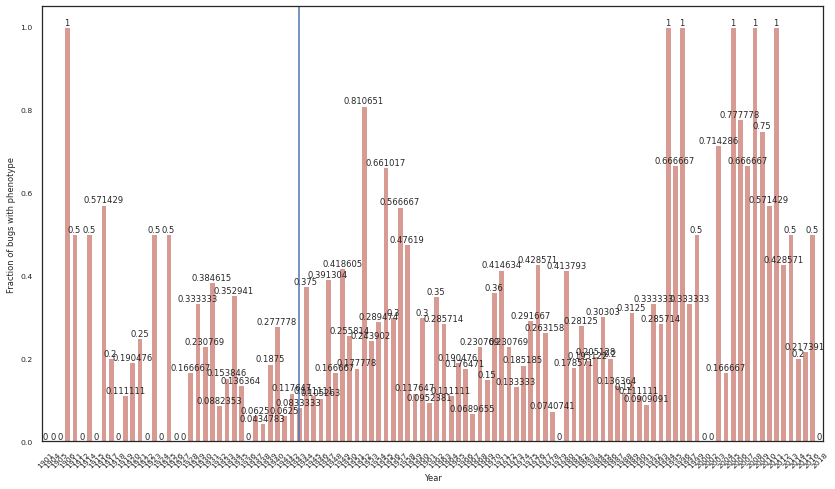

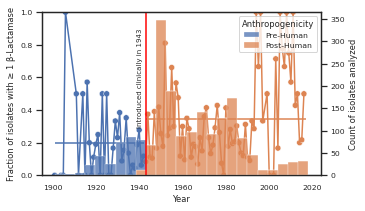

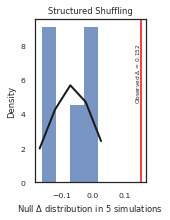

P-value (structured) = 0.0009


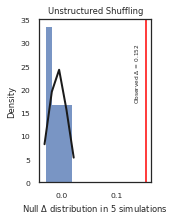

P-value (unstructured) = 0.0000


In [26]:
plot_abresist_frac(
    df=df,
    ex="beta-lactamase",
    year=1943,
    sims=5,
    verbose=False,
    col="AMR Gene Family",
    value="≥ 1 β-Lactamase",
    savefig=True,
    smooth=0,
    figname="./figs/fig4/all-betalactamase",
)

In [12]:
import scipy.stats as stats
from scipy.stats import binom


def calculate_frequency_bounds(row, confidence=0.95):
    successes = row["num_pos"]
    attempts = row["all"]
    freq = row["num_pos"] / row["all"]
    alpha = successes + 1
    beta = attempts - successes + 1
    lower_b, upper_b = stats.beta.interval(confidence, alpha, beta)
    # return (freq - lower_b, upper_b - freq)
    return (lower_b, upper_b)


def plot_abresist_frac_error(
    df,
    ex,
    year,
    verbose=True,
    sims=100,
    figname="doodoo",
    savefig=False,
    smooth=5,
    col="Drug Class",
    value="phenotype",
):

    sns.set_theme(font="Arial", style="white", font_scale=0.7)

    frac_df, pre, post = measure_obs_distance(df, ex, year, col, verbose)
    dist = post - pre

    print(frac_df)

    # histogram of fraction of strains w/ RGI hits for drug class
    plt.figure(figsize=(14, 8))
    chart = sns.barplot(
        data=frac_df, x="year", y="frac", color="salmon", saturation=0.5
    )
    chart.bar_label(chart.containers[0])

    plt.axvline(pd.Index(frac_df["year"]).get_loc(year, method="nearest"))
    plt.ylabel("Fraction of bugs with phenotype")
    plt.xlabel("Year")
    plt.xticks(rotation=45)

    plt.show()

    d = {"Year": [], "num_pos": [], "all": [], "Anthropogenicity": []}
    # xdf is the fractional df denoting the fraction of bugs w/ resistance
    for years in range(frac_df["year"].min(), frac_df["year"].max()):
        upb = smooth + years
        downb = years - smooth
        g = frac_df.loc[(frac_df["year"] <= upb) & (downb <= frac_df["year"])]
        if years not in frac_df["year"].values:
            continue
        d["Year"].append(years)
        if years >= year:
            d["Anthropogenicity"].append("Post-Human")
        else:
            d["Anthropogenicity"].append("Pre-Human")
        d["num_pos"].append(g["num_pos"].sum())
        d["all"].append(g["all"].sum())
        # print(d)
        # d["frac"].append(d['num_pos'][0]/d['all'][0])
    xdf = pd.DataFrame(data=d)
    print(xdf)
    xdf["frac"] = xdf["num_pos"] / xdf["all"]
    # xdf["error"] = np.sqrt(xdf["frac"] * (1 - xdf["frac"]) / xdf["all"])
    xdf[["lower-error", "upper-error"]] = xdf.apply(
        calculate_frequency_bounds, axis=1, result_type="expand"
    )
    # xdf["se"] = 1.96 * xdf["error"]
    # xdf["ci_high"], xdf["ci_high"] = binom.interval(0.95, xdf["all"], xdf["frac"])
    # print(xdf)

    # make subplots for the figure
    fig1, ax1 = plt.subplots(figsize=(14, 8))

    ax1.set(xlabel="Year Cultured")

    lp = sns.lineplot(
        data=xdf,
        x="Year",
        y="frac",
        markers=True,
        hue="Anthropogenicity",
        palette=[sns.color_palette("deep")[0], sns.color_palette("deep")[1]],
        # legend=False,
        ax=ax1,
    )
    lp.set(ylim=(0, 1))

    # Get the current legend
    legend = ax1.legend()

    # Change the legend title
    legend.set_title("")

    # Change legend labels
    new_labels = ["Pre-clinical", "Post-clinical"]
    for t, l in zip(
        legend.texts[0:], new_labels
    ):  # Skip the first text which is the title
        t.set_text(l)

    dp = sns.scatterplot(
        data=xdf,
        x="Year",
        y="frac",
        hue="Anthropogenicity",
        palette=[sns.color_palette("deep")[0], sns.color_palette("deep")[1]],
        legend=False,
        ax=ax1,
        edgecolor="none",
    )
    plt.fill_between(
        xdf.loc[xdf["Year"] < year]["Year"],
        xdf.loc[xdf["Year"] < year]["lower-error"],
        xdf.loc[xdf["Year"] < year]["upper-error"],
        alpha=0.3,
        edgecolor=sns.color_palette("deep")[0],
        facecolor=sns.color_palette("deep")[0],
    )
    plt.fill_between(
        xdf.loc[xdf["Year"] >= year]["Year"],
        xdf.loc[xdf["Year"] >= year]["lower-error"],
        xdf.loc[xdf["Year"] >= year]["upper-error"],
        alpha=0.3,
        edgecolor=sns.color_palette("deep")[1],
        facecolor=sns.color_palette("deep")[1],
    )
    # ax1.errorbar(
    #     xdf.loc[xdf["Year"] < year]["Year"],
    #     xdf.loc[xdf["Year"] < year]["frac"],
    #     yerr=[
    #         xdf.loc[xdf["Year"] < year]["lower-error"],
    #         xdf.loc[xdf["Year"] < year]["upper-error"],
    #     ],
    #     fmt="none",
    #     capsize=3,
    #     capthick=1,
    #     color=sns.color_palette("deep")[0],
    #     errorevery=2,
    # )
    # ax1.errorbar(
    #     xdf.loc[xdf["Year"] >= year]["Year"],
    #     xdf.loc[xdf["Year"] >= year]["frac"],
    #     yerr=[
    #         xdf.loc[xdf["Year"] >= year]["lower-error"],
    #         xdf.loc[xdf["Year"] >= year]["upper-error"],
    #     ],
    #     fmt="none",
    #     capsize=3,
    #     capthick=1,
    #     color=sns.color_palette("deep")[1],
    #     errorevery=2,
    # )
    plt.axvline(year, color="red")
    # dp = sns.pointplot(
    #     data=xdf,
    #     x="Year",
    #     y="frac",
    #     hue="Anthropogenicity",
    #     palette=[sns.color_palette("deep")[0], sns.color_palette("deep")[1]],
    #     legend=False,
    #     ax=ax1,
    # )
    ax1.set(ylabel="Fraction of isolates with {}".format(value))
    plt.axvline(year, color="red")  # , label='{} introduced'.format(year))
    trans = ax1.get_xaxis_transform()
    # x = 10
    plt.text(
        year - 4,
        0.3,
        "Introduced clinically in {}".format(year),
        rotation=90,
        transform=trans,
        fontsize="small",
    )
    preab_df = xdf.loc[xdf["Anthropogenicity"] == "Pre-Human"]
    lp.hlines(
        y=preab_df["frac"].mean(),
        xmin=preab_df["Year"].min(),
        xmax=preab_df["Year"].max(),
        color=sns.color_palette("deep")[0],
    )

    postab_df = xdf.loc[xdf["Anthropogenicity"] == "Post-Human"]
    lp.hlines(
        y=postab_df["frac"].mean(),
        xmin=postab_df["Year"].min(),
        xmax=postab_df["Year"].max(),
        color=sns.color_palette("deep")[1],
    )
    if savefig:
        plt.gcf().set_size_inches(5.0, 3)
        plt.savefig(
            "{}-fractionofresist.svg".format(figname),
            bbox_inches="tight",
            dpi=300,
        )

    fig2, ax2 = plt.subplots(figsize=(14, 8))
    ax2.set(ylabel="Count of isolates analyzed", xlabel="Year Cultured")

    # ax2 = ax1.twinx()

    # create another copy of the dataframe
    drop_dups = df.drop_duplicates(subset=["Accession_Number"]).copy()
    drop_dups["Anthropogenicity"] = "Post-Human"
    # print(drop_dups)

    drop_dups.loc[drop_dups["Year_Cultured"] < year, ["Anthropogenicity"]] = "Pre-Human"
    histogram = sns.histplot(
        data=drop_dups,
        x="Year_Cultured",
        hue="Anthropogenicity",
        palette=[sns.color_palette("deep")[0], sns.color_palette("deep")[1]],
        ax=ax2,
        multiple="stack",
        linewidth=0.3,
    )
    # dp.axvline(year, color="red")#, label='{} introduced'.format(year))
    # plt.legend()
    # plt.text(4, 1, f'{year} introduce', ha='left', va='center')

    if savefig:
        plt.gcf().set_size_inches(5.0, 3)
        plt.savefig(
            "{}-histogram.svg".format(figname),
            bbox_inches="tight",
            dpi=300,
        )
    plt.show()

    #     fig, ax1 = plt.subplots()

    #     ax2 = ax1.twinx()

    #     sns.barplot(x="Announced Year", y="Amount Awarded", data=df, ax=ax2, alpha=.5)
    #     sns.scatterplot(x=np.arange(0,len(df)), y="Number of Awarded", data=df, ax=ax1)

    #     fig.tight_layout()  # otherwise the right y-label is slightly clipped

    #     plt.title('2016 to 2019 Announcements')

    if sims == 0:
        return

    preab_mean = frac_df.loc[frac_df["Anthropogenicity"] == "Pre-Human"]["frac"].mean()
    postab_mean = frac_df.loc[frac_df["Anthropogenicity"] == "Post-Human"][
        "frac"
    ].mean()

    nulldist = shuffleyears_structured(df, ex, year, col, verbose, simulations=sims)
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.histplot(
        nulldist, stat="density", color=sns.color_palette("deep")[0], linewidth=0
    )
    xmin, xmax = plt.xlim()
    mu_struct, std_struct = norm.fit(nulldist)
    x = np.linspace(xmin, xmax, sims)
    y_pdf = norm.pdf(x, mu_struct, std_struct)
    plt.plot(x, y_pdf, "k", linewidth=2)
    plt.axvline(dist, color="red")
    trans = ax.get_xaxis_transform()
    # x = 10
    plt.text(
        dist * 0.85,
        0.5,
        "Observed $\Delta$ = {:.3f}".format(dist),
        rotation=90,
        transform=trans,
        fontsize="x-small",
    )
    # plt.legend()
    plt.title("Structured Shuffling")
    plt.xlabel("Null $\Delta$ distribution in {} simulations".format(sims))
    if savefig:
        plt.gcf().set_size_inches(2, 3)
        plt.savefig(
            "{}-structuredshuffling.svg".format(figname), bbox_inches="tight", dpi=300
        )
    plt.show()
    pval = norm.cdf(dist, mu_struct, std_struct)
    if pval > 0.5:
        pval = 1 - pval
    print("P-value (structured) = {:.4f}".format(pval))

    nulldist = shuffleyears_unstructured(df, ex, year, col, verbose, simulations=sims)
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.histplot(
        nulldist, stat="density", color=sns.color_palette("deep")[0], edgecolor="none"
    )
    xmin, xmax = plt.xlim()
    mu_unstruct, std_unstruct = norm.fit(nulldist)
    x = np.linspace(xmin, xmax, sims)
    y_pdf = norm.pdf(x, mu_unstruct, std_unstruct)
    plt.plot(x, y_pdf, "k", linewidth=2)
    plt.axvline(dist, color="red")
    trans = ax.get_xaxis_transform()
    # x = 10
    plt.text(
        dist * 0.85,
        0.5,
        "Observed $\Delta$ = {:.3f}".format(dist),
        rotation=90,
        transform=trans,
        fontsize="x-small",
    )
    # plt.legend()
    plt.title("Unstructured Shuffling")
    plt.xlabel("Null $\Delta$ distribution in {} simulations".format(sims))
    if savefig:
        plt.gcf().set_size_inches(2, 3)
        plt.savefig(
            "{}-unstructuredshuffling.svg".format(figname), bbox_inches="tight", dpi=300
        )
    plt.show()
    pval = norm.cdf(dist, mu_unstruct, std_unstruct)
    if pval > 0.5:
        pval = 1 - pval
    print("P-value (unstructured) = {:.4f}".format(pval))

     year  num_pos  all      frac Anthropogenicity
0    1901        0    1  0.000000        Pre-Human
1    1904        0    1  0.000000        Pre-Human
2    1905        0    1  0.000000        Pre-Human
3    1906        2    2  1.000000        Pre-Human
4    1911        1    2  0.500000        Pre-Human
..    ...      ...  ...       ...              ...
103  2013        4    8  0.500000       Post-Human
104  2014        1    5  0.200000       Post-Human
105  2015        5   23  0.217391       Post-Human
106  2016        1    2  0.500000       Post-Human
107  2018        0    1  0.000000       Post-Human

[108 rows x 5 columns]


/tmp/ipykernel_17224/682399949.py:43: FutureWarning:

Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.



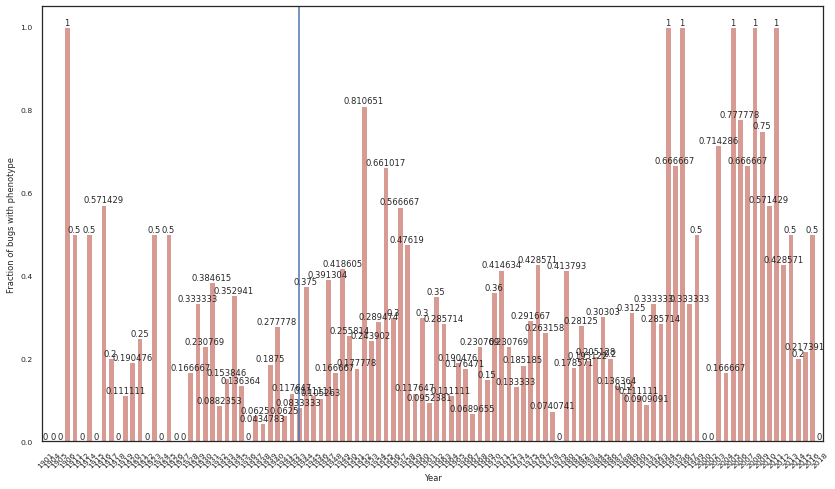

     Year  num_pos  all Anthropogenicity
0    1901        2    5        Pre-Human
1    1904        2    5        Pre-Human
2    1905        2    5        Pre-Human
3    1906        3    7        Pre-Human
4    1911        8   15        Pre-Human
..    ...      ...  ...              ...
102  2012       32   68       Post-Human
103  2013       30   66       Post-Human
104  2014       24   60       Post-Human
105  2015       21   56       Post-Human
106  2016       17   49       Post-Human

[107 rows x 4 columns]


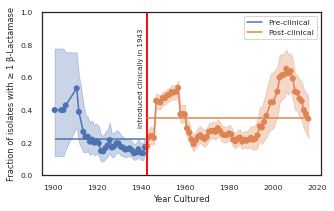

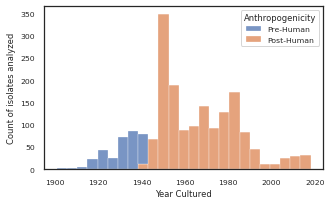

In [13]:
plot_abresist_frac_error(
    df=df,
    ex="beta-lactamase",
    year=1943,
    # sims=5000,
    # sims=5,
    sims=0,
    verbose=False,
    col="AMR Gene Family",
    value="≥ 1 β-Lactamase",
    savefig=True,
    smooth=5,
    figname="./figs/fig4/all-betalactamase",
)

## ESKAPE pathogens

In [12]:
eskape_pathogens = df.loc[
    df["Strain"].str.contains(
        "Enterococcus faecium|Salmonella enterica|Klebsiella pneumoniae|Acinetobacter baumannii|Pseudomonas aeruginosa|Enterobacter"
    )
].copy()
eskape_pathogens["CleanSpecies"] = eskape_pathogens["Strain"]
eskape_pathogens.loc[
    eskape_pathogens["Strain"].str.contains("Enterococcous faecium"), ["CleanSpecies"]
] = "Enterococcus faecium"
eskape_pathogens.loc[
    eskape_pathogens["Strain"].str.contains("Salmonella enterica"), ["CleanSpecies"]
] = "Salmonella enterica"
eskape_pathogens.loc[
    eskape_pathogens["Strain"].str.contains("Klebsiella pneumoniae"), ["CleanSpecies"]
] = "Klebsiella pneumoniae"
eskape_pathogens.loc[
    eskape_pathogens["Strain"].str.contains("Acinetobacter baumannii"), ["CleanSpecies"]
] = "Acinetobacter baumannii"
eskape_pathogens.loc[
    eskape_pathogens["Strain"].str.contains("Pseudomonas aeruginosa"), ["CleanSpecies"]
] = "Pseudomonas aeruginosa"
eskape_pathogens.loc[
    eskape_pathogens["Strain"].str.contains("Enterobacter"), ["CleanSpecies"]
] = "Enterobacter sp."
eskape_pathogens.drop_duplicates("Accession_Number").sort_values("Year_Cultured")
family_name = eskape_pathogens["CleanSpecies"].str.split(" ", expand=True)[0].str[0]
species_name = eskape_pathogens["CleanSpecies"].str.split(" ", expand=True)[1]
eskape_pathogens["Species"] = family_name + ". " + species_name
eskape_pathogens.loc[
    eskape_pathogens["Species"].str.match("E. sp."), ["Species"]
] = "Enterobacter sp."

    year  num_pos  all      frac Anthropogenicity
0   1911        1    2  0.500000        Pre-Human
1   1915        0    1  0.000000        Pre-Human
2   1917        0    2  0.000000        Pre-Human
3   1918        0    1  0.000000        Pre-Human
4   1920        1    6  0.166667        Pre-Human
..   ...      ...  ...       ...              ...
66  2008        5    5  1.000000       Post-Human
67  2010        2    3  0.666667       Post-Human
68  2011        3    3  1.000000       Post-Human
69  2012        2    2  1.000000       Post-Human
70  2013        1    2  0.500000       Post-Human

[71 rows x 5 columns]


/tmp/ipykernel_4393/2179869796.py:31: FutureWarning:

Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.



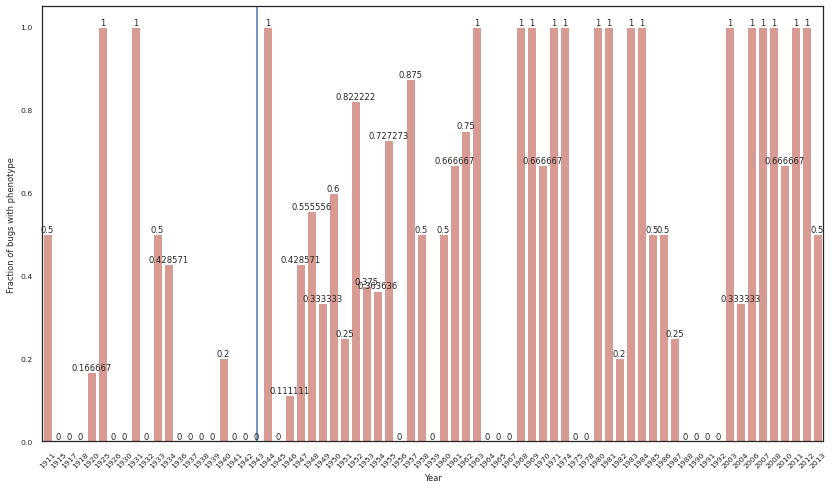

     Year  num_pos  all Anthropogenicity      frac     error        se  \
0    1911        1    3        Pre-Human  0.333333  0.272166  0.533444   
1    1912        1    5        Pre-Human  0.200000  0.178885  0.350615   
2    1913        1    6        Pre-Human  0.166667  0.152145  0.298205   
3    1914        1    6        Pre-Human  0.166667  0.152145  0.298205   
4    1915        2   12        Pre-Human  0.166667  0.107583  0.210862   
..    ...      ...  ...              ...       ...       ...       ...   
97   2008       19   23       Post-Human  0.826087  0.079034  0.154907   
98   2009       17   21       Post-Human  0.809524  0.085689  0.167951   
99   2010       16   18       Post-Human  0.888889  0.074074  0.145185   
100  2011       16   18       Post-Human  0.888889  0.074074  0.145185   
101  2012       14   16       Post-Human  0.875000  0.082680  0.162052   

     ci_high  
0        3.0  
1        3.0  
2        3.0  
3        3.0  
4        5.0  
..       ...  
97    

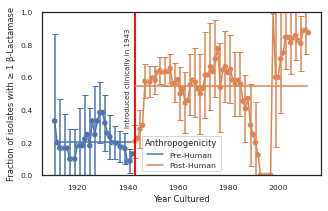

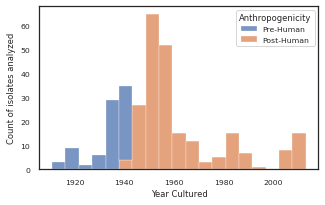

KeyboardInterrupt: 

In [13]:
plot_abresist_frac_error(
    df=eskape_pathogens,
    ex="beta-lactamase",
    year=1943,
    sims=5000,
    verbose=False,
    col="AMR Gene Family",
    value="≥ 1 β-Lactamase",
    savefig=True,
    smooth=5,
    figname="./figs/fig4/eskape-betalactamase",
)

# Meta-analysis

In [ ]:
drugyear_usage = {
    "fluoroquinolone antibiotic": 1962,
    "penam": 1943,
    "cephalosporin": 1964,
    "tetracycline antibiotic": 1948,
    "phenicol antibiotic": 1949,
    "macrolide antibiotic": 1952,
    "rifamycin antibiotic": 1963,
    "aminoglycoside antibiotic": 1946,
    # "peptide antibiotic": 1941,  # not sure about this one
    # "glycylcycline": 1948,  # using year tetracyclines were introduced clinically
    # "triclosan": 1968,  # using wiki page
    # "cephamycin": 1964,  # using cephalosporin year
    "carbapenem": 1985,
    # "aminocoumarin antibiotic": 1965,  # best guess from wiki article
    # "penem": 1985,  # using year carbapenems were introduced
    "monobactam": 1986,
    # "disinfecting agents and intercalating dyes": 1930,  # no clue
    # "acridine dye": 1970,  # no clue?
    # "diaminopyrimidine antibiotic": 1962,
    # "elfamycin antibiotic": 1978,  # no clue
    # "fosfomycin": 1971,
    # "nucleoside antibiotic": 2014,  # no clue, but looks newish
    "lincosamide antibiotic": 1963,
    # "nitroimidazole antibiotic": 1960,
    # "Null": 1920,
    # "benzalkonium chloride": 1950,  # no clude
    # "rhodamine": 1950,  # no clude
    "sulfonamide antibiotic": 1936,
    "nitrofuran antibiotic": 1953,
    # "streptogramin antibiotic": 1965,
    # "oxazolidinone antibiotic": 2000,
    "glycopeptide antibiotic": 1958,
    # "fusidic acid": 1962,
    # "pleuromutilin antibiotic": 2007,
    # "bicyclomycin": 1972,  # from wiki
    # "antibacterial free fatty acids": 2000,  # noclude
    # "para-aminosalicylic acid": 1943,
    # "isoniazid": 1952,
    # "polyamine antibiotic": 2005,  # no idea
}

In [ ]:
confident_drugyears = [
    "fluoroquinolone antibiotic",
    "penam",
    "cephalosporin",
    "tetracycline antibiotic",
    "phenicol antibiotic",
    "macrolide antibiotic",
    "rifamycin antibiotic",
    "aminoglycoside antibiotic",
    "carbapenem",
    "monobactam",
    "diaminopyrimidine antibiotic",
    "fosfomycin",
    "lincosamide antibiotic",
    "nitroimidazole antibiotic",
    "sulfonamide antibiotic",
    "nitrofuran antibiotic",
    "streptogramin antibiotic",
    "oxazolidinone antibiotic",
    "glycopeptide antibiotic",
    "fusidic acid",
    "pleuromutilin antibiotic",
    "para-aminosalicylic acid",
    "isoniazid",
]

In [ ]:
drug_count = {}
for x in list(df["Drug Class"]):
    classes = x.split("; ")
    for c in classes:
        if c in drug_count:
            drug_count[c] += 1
        else:
            drug_count[c] = 1
allbugs_allresist = pd.read_csv(
    "./10000sims-ALL-pvalues",
    names=["Drug Class", "Delta", "Struct_Pval", "Unstruct_Pval"],
    skiprows=[0],
)
allbugs_allresist["NumHits"] = allbugs_allresist["Drug Class"].map(drug_count)
allbugs_allresist = allbugs_allresist.loc[
    allbugs_allresist["Drug Class"].str.match("|".join(confident_drugyears))
].sort_values("Struct_Pval")
allbugs_allresist

In [ ]:
plot_abresist_frac(
    df=df,
    ex="aminoglycoside antibiotic",
    year=drugyear_usage["aminoglycoside antibiotic"],
    sims=0,
    verbose=True,
    col="Drug Class",
    value="",
    savefig=False,
)

In [ ]:
drug_count = {}
for x in list(
    df.loc[~df["Resistance Mechanism"].str.match("antibiotic efflux")]["Drug Class"]
):
    classes = x.split("; ")
    for c in classes:
        if c in drug_count:
            drug_count[c] += 1
        else:
            drug_count[c] = 1
allbugs_noeff = pd.read_csv(
    "./10000sims-ALL-noefflux-pvalues",
    names=["Drug Class", "Delta", "Struct_Pval", "Unstruct_Pval"],
    skiprows=[0],
)
allbugs_noeff["NumHits"] = allbugs_noeff["Drug Class"].map(drug_count)
allbugs_noeff = allbugs_noeff.loc[
    allbugs_noeff["Drug Class"].str.match("|".join(confident_drugyears))
].sort_values("Struct_Pval")
allbugs_noeff

In [ ]:
eskape_bugs = [
    "Enterococcus faecium",
    "Staphylococcus aureus",
    "Klebsiella pneumoniae",
    "Acinetobacter baumannii",
    "Pseudomonas aeruginosa",
    "Enterobacter",
]
eskapedf = df.loc[df["Strain"].str.contains("|".join(eskape_bugs))].copy()
eskapedf["SpeciesName"] = "NONE"
eskapedf.loc[
    eskapedf["Strain"].str.contains("Enterococcus faecium"), "SpeciesName"
] = "Enterococcus faecium"
eskapedf.loc[
    eskapedf["Strain"].str.contains("Staphylococcus aureus"), "SpeciesName"
] = "Staphylococcus aureus"
eskapedf.loc[
    eskapedf["Strain"].str.contains("Klebsiella pneumoniae"), "SpeciesName"
] = "Klebsiella pneumoniae"
eskapedf.loc[
    eskapedf["Strain"].str.contains("Acinetobacter baumannii"), "SpeciesName"
] = "Acinetobacter baumannii"
eskapedf.loc[
    eskapedf["Strain"].str.contains("Pseudomonas aeruginosa"), "SpeciesName"
] = "Pseudomonas aeruginosa"
eskapedf.loc[
    eskapedf["Strain"].str.contains("Enterobacter"), "SpeciesName"
] = "Enterobacter"

eskape_integron = rgiintegron.loc[
    rgiintegron["Strain"].str.contains("|".join(eskape_bugs))
].copy()
eskapedf["Integron"] = "False"
m = eskapedf["ORF_ID"].isin(eskape_integron["ORF_ID"])
eskapedf.loc[m, "Integron"] = "True"
# eskapedf['Integron'].value_counts()

eskapedf["Plasmid"] = "Null"
eskapedf.loc[
    (eskapedf["SpeciesName"] == "Klebsiella pneumoniae")
    | (eskapedf["SpeciesName"] == "Enterococcus faecium")
    | (eskapedf["SpeciesName"] == "Acinetobacter baumannii"),
    "Plasmid",
] = "False"
eskapedf.loc[
    eskapedf["ORF_ID"].isin(
        pd.concat([faeciumplasmids_df, baumanniiplasmids_df, klebplasmids_df])["ORF_ID"]
    ),
    "Plasmid",
] = "True"
df.drop_duplicates("Accession_Number")["Strain"].value_counts()

In [ ]:
drug_count = {}
for x in list(eskapedf["Drug Class"]):
    classes = x.split("; ")
    for c in classes:
        if c in drug_count:
            drug_count[c] += 1
        else:
            drug_count[c] = 1
# print(drug_count)
eskape_allresist = pd.read_csv(
    "./10000sims-ESKAPE-pvalues",
    names=["Drug Class", "Delta", "Struct_Pval", "Unstruct_Pval"],
    skiprows=[0],
)
eskape_allresist["NumHits"] = eskape_allresist["Drug Class"].map(drug_count)
eskape_allresist = eskape_allresist.loc[
    eskape_allresist["Drug Class"].str.match("|".join(confident_drugyears))
].sort_values("Struct_Pval")
eskape_allresist

In [ ]:
drug_count = {}
for x in list(
    eskapedf.loc[~eskapedf["Resistance Mechanism"].str.match("antibiotic efflux")][
        "Drug Class"
    ]
):
    classes = x.split("; ")
    for c in classes:
        if c in drug_count:
            drug_count[c] += 1
        else:
            drug_count[c] = 1
# print(drug_count)
eskape_noeff = pd.read_csv(
    "./10000sims-ESKAPE-noefflux-pvalues",
    names=["Drug Class", "Delta", "Struct_Pval", "Unstruct_Pval"],
    skiprows=[0],
)
eskape_noeff["NumHits"] = eskape_noeff["Drug Class"].map(drug_count)
eskape_noeff = eskape_noeff.loc[
    eskape_noeff["Drug Class"].str.match("|".join(confident_drugyears))
].sort_values("Struct_Pval")
eskape_noeff

In [ ]:
allbugs_allresist["Dataset"] = "Full Data"
allbugs_noeff["Dataset"] = "Full Data"
eskape_noeff["Dataset"] = "ESKAPE"
eskape_allresist["Dataset"] = "ESKAPE"
allbugs_allresist["Mechanism"] = "All"
allbugs_noeff["Mechanism"] = "No Efflux"
eskape_noeff["Mechanism"] = "No Efflux"
eskape_allresist["Mechanism"] = "All"
tenthousandsims_values = pd.concat(
    [
        allbugs_noeff.loc[allbugs_noeff["NumHits"] > 10],
        allbugs_allresist.loc[allbugs_allresist["NumHits"] > 10],
        eskape_noeff.loc[eskape_noeff["NumHits"] > 10],
        eskape_allresist.loc[eskape_allresist["NumHits"] > 10],
    ]
)

In [ ]:
fig = px.scatter(
    tenthousandsims_values,
    x="Drug Class",
    y="Struct_Pval",
    symbol="Mechanism",
    # stripmode='overlay',
    color="Dataset",
    hover_data=["NumHits"],
    # log_y=True,
    labels={"Struct_Pval": "P-value"},
    title="Significance of human production of a given drug class on resistome",
)
fig.add_hline(y=0.1, annotation_text="P-value = 0.1")
# fig.write_image("drugclass_pvals.pdf")